# Read Images to Arrays

In [47]:
import tensorflow
import os
import tarfile
import cv2
import h5py
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageOps
import pandas as pd
from skimage.util import img_as_ubyte
import csv
from numpy import savez_compressed
from numpy import load
import glob

In [36]:
# slower way of reading .png to arrays
def png_to_array(origin_path):
    X_data = np.empty((1,64,64,3),dtype = np.uint8)
    #print(os.getcwd())
    files = glob.glob(origin_path+"*.png")
    lenth = len(files)
    for i in range(lenth):
        myFile = origin_path+f'{i+1}.png'
        image = cv2.imread(myFile)
        image = np.expand_dims(image, axis=0)
        #print(image)
        image = img_as_ubyte(image)
        X_data = np.concatenate((X_data, image), axis=0)
    X_data = np.array(X_data)
    X_data = np.delete(X_data, 0,0)
    return X_data

In [51]:
# fast way of reading .png to arrays
def png_to_array2(origin_path):
    #print(os.getcwd())
    files = glob.glob(origin_path+"*.png")
    N = len(files)
    imgs = np.empty((N,64,64,3), dtype='uint16')
    for i in range(N):
        myFile = origin_path+f'{i+1}.png'
        image = img_as_ubyte(cv2.imread(myFile))
        imgs[i,:,:,:] = image
    return imgs

In [30]:
# save the infomation of images to a test array
test_array = png_to_array2(os.getcwd()+'/data/test_cropped/')
savez_compressed(os.path.join(os.getcwd()+'/data/','test_cropped.npz'), test_array)

In [31]:
# save the infomation of images to a train array
train_array = png_to_array2(os.getcwd()+'/data/train_cropped/')
savez_compressonedrived(os.path.join(os.getcwd()+'/data/','train_cropped.npz'), train_array)

In [10]:
# save the infomation of images to a train array
extra_array = png_to_array2(os.getcwd()+'/data/extra_cropped/')
savez_compressed(os.path.join(os.getcwd()+'/data/','extra_cropped.npz'), extra_array)

In [11]:
# test if the labels are consist with pictures
train_data1 = load(os.getcwd()+'/data/train_cropped.npz', allow_pickle=True)
train = train_data1['arr_0']

test_data1 = load(os.getcwd()+'/data/test_cropped1.npz', allow_pickle=True)
test = test_data1['arr_0']

In [41]:
# train labels
label_train = load(os.getcwd()+'/data/label/train_label.npz', allow_pickle=True)
label_train = label_train['arr_0']
label_train = label_train[:20]
print(label_train)

[[ 2.  1.  9. 10. 10. 10.]
 [ 2.  2.  3. 10. 10. 10.]
 [ 2.  2.  5. 10. 10. 10.]
 [ 2.  9.  3. 10. 10. 10.]
 [ 2.  3.  1. 10. 10. 10.]
 [ 2.  3.  3. 10. 10. 10.]
 [ 2.  2.  8. 10. 10. 10.]
 [ 3.  7.  4.  4. 10. 10.]
 [ 3.  1.  2.  8. 10. 10.]
 [ 2.  1.  6. 10. 10. 10.]
 [ 2.  2.  3. 10. 10. 10.]
 [ 2.  6.  3. 10. 10. 10.]
 [ 2.  4.  2. 10. 10. 10.]
 [ 2.  5.  8. 10. 10. 10.]
 [ 2.  1.  6. 10. 10. 10.]
 [ 2.  2.  3. 10. 10. 10.]
 [ 2.  7.  9. 10. 10. 10.]
 [ 2.  5.  3. 10. 10. 10.]
 [ 3.  2.  2.  2. 10. 10.]
 [ 2.  6.  2. 10. 10. 10.]]


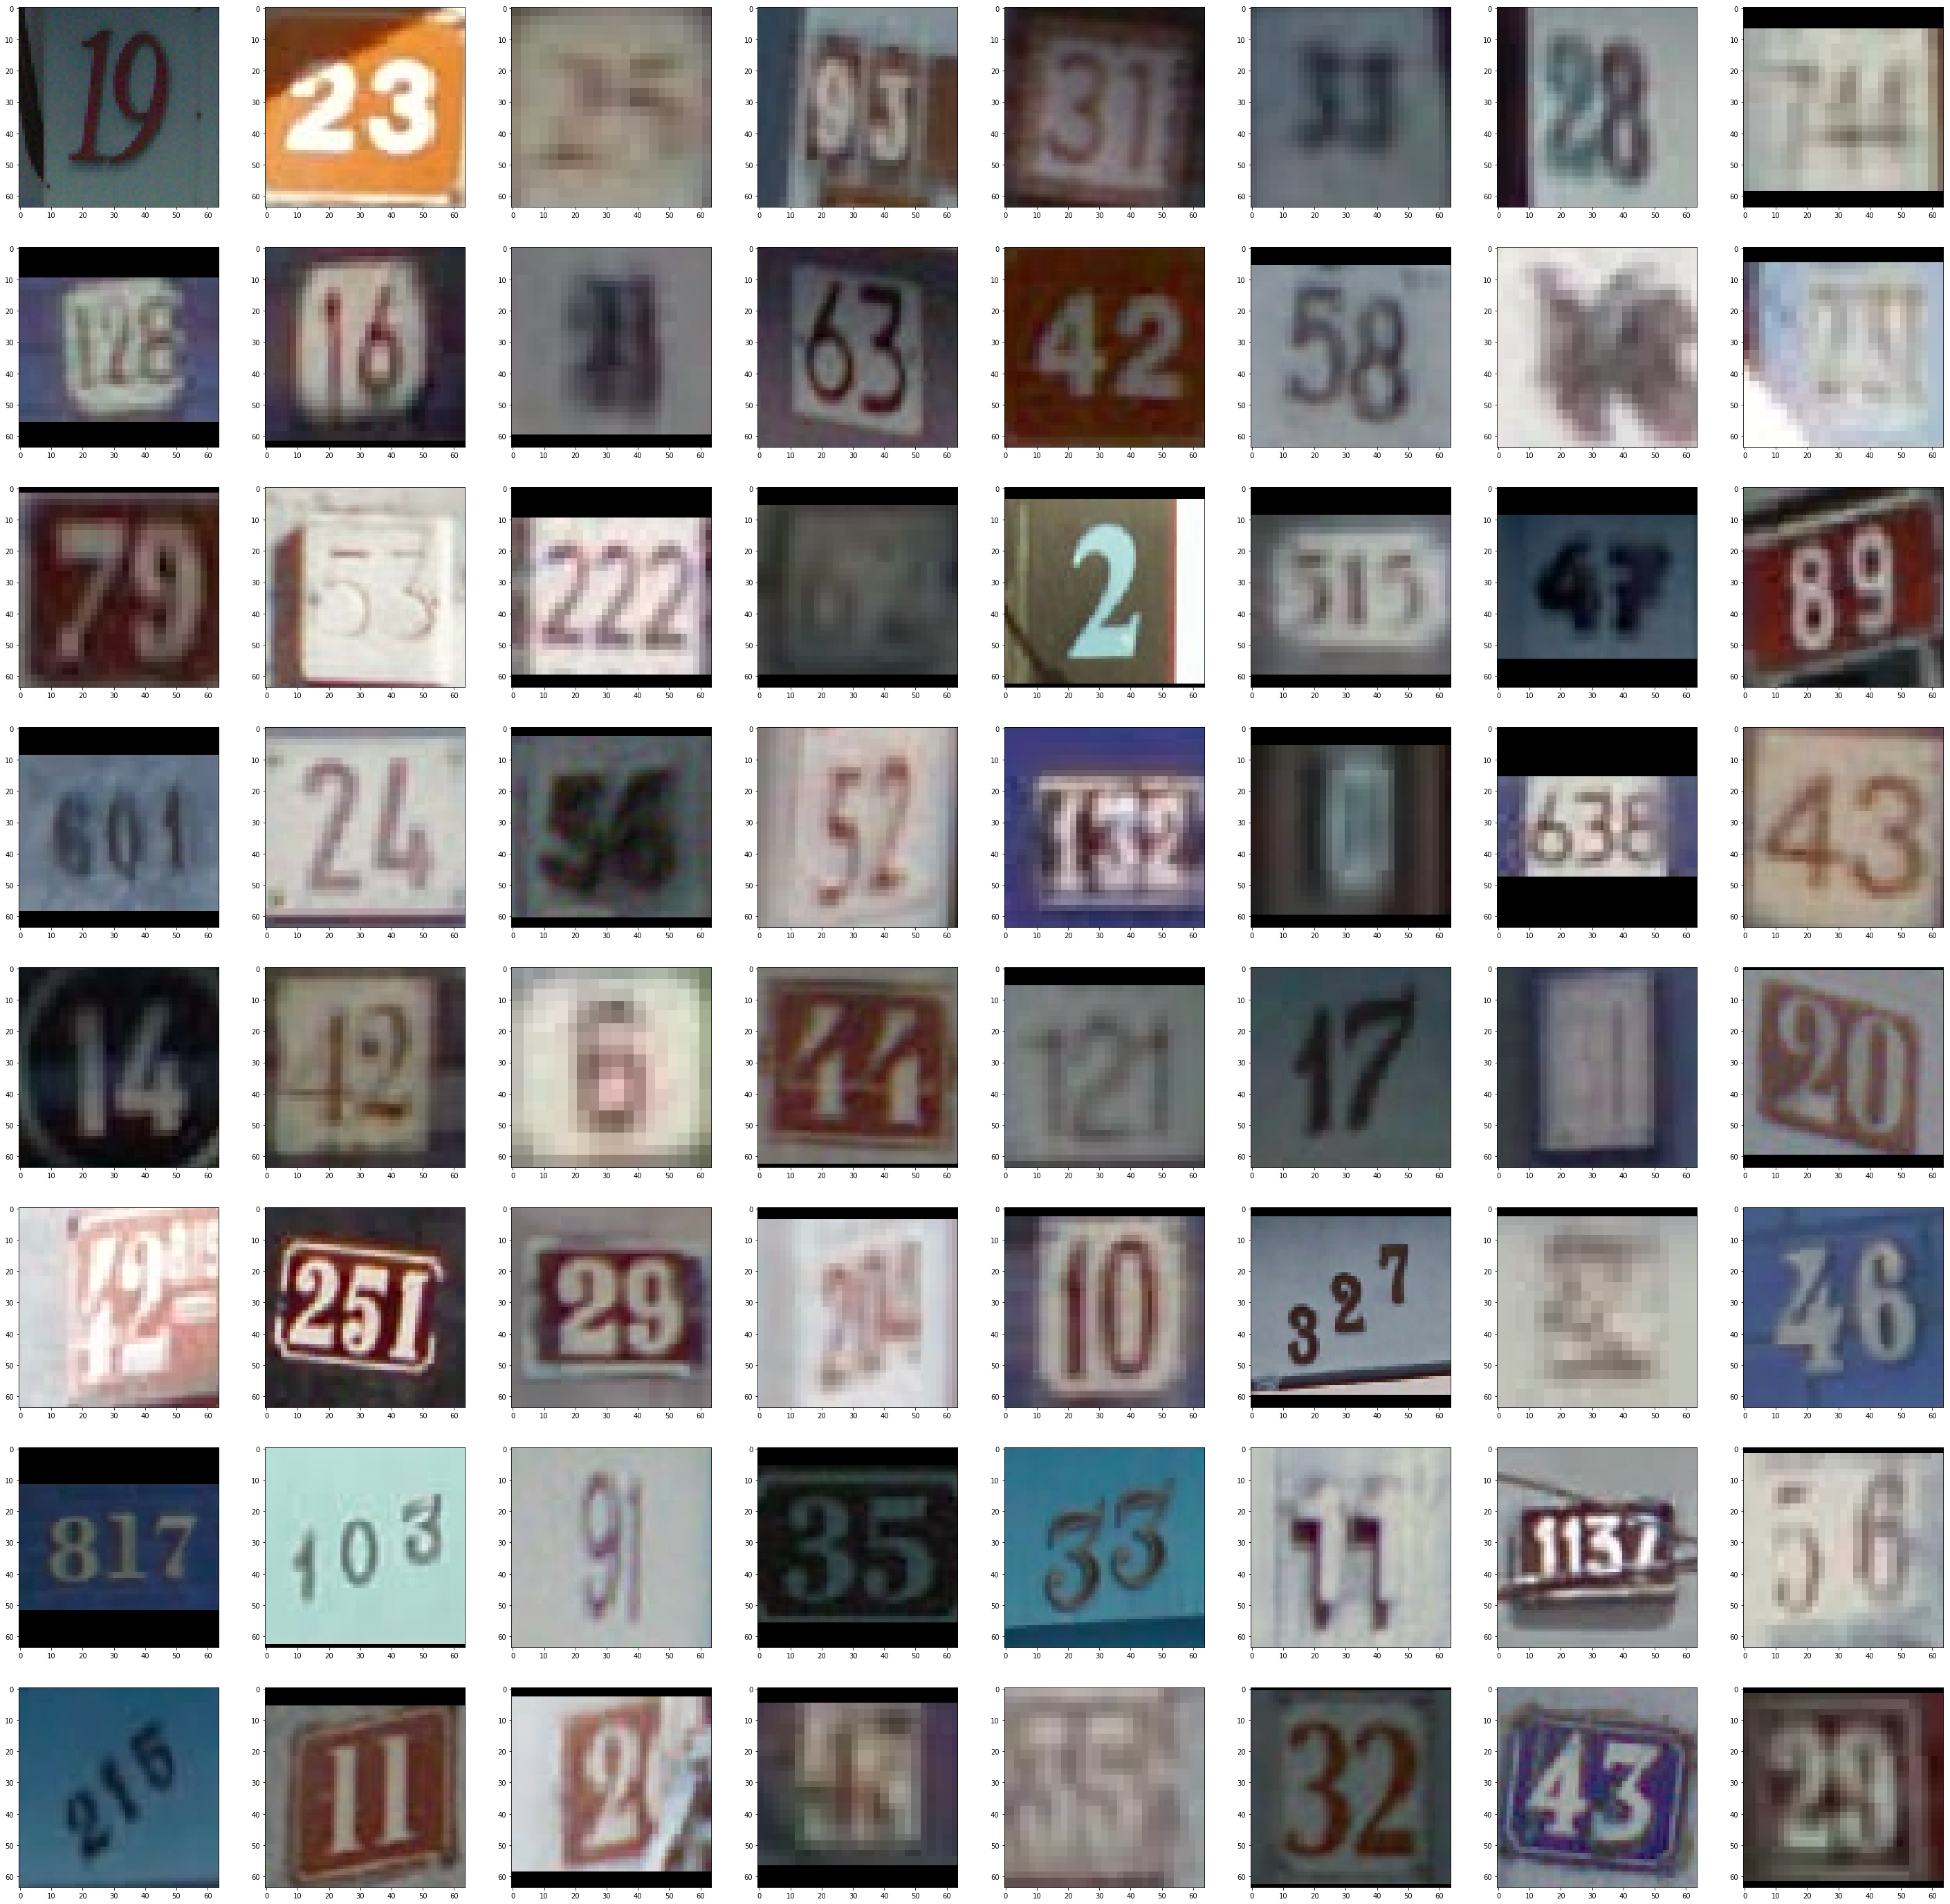

In [46]:
# train images
fig = plt.figure(figsize=(50, 50))  # width, height in inches
for i in range(64):
    sub = fig.add_subplot(8, 8, i + 1)
    sub.imshow(train[i,:,:,:], interpolation='nearest')

In [42]:
# test labels
label_test = load(os.getcwd()+'/data/label/test_label.npz', allow_pickle=True)
label_test = label_test['arr_0']
label_test = label_test[:20]
print(label_test)

[[ 1.  5. 10. 10. 10. 10.]
 [ 3.  2.  1.  0. 10. 10.]
 [ 1.  6. 10. 10. 10. 10.]
 [ 1.  1. 10. 10. 10. 10.]
 [ 1.  9. 10. 10. 10. 10.]
 [ 1.  1. 10. 10. 10. 10.]
 [ 3.  1.  8.  3. 10. 10.]
 [ 2.  6.  5. 10. 10. 10.]
 [ 3.  1.  4.  4. 10. 10.]
 [ 2.  1.  6. 10. 10. 10.]
 [ 2.  3.  4. 10. 10. 10.]
 [ 2.  2.  0. 10. 10. 10.]
 [ 2.  1.  3. 10. 10. 10.]
 [ 2.  2.  5. 10. 10. 10.]
 [ 1.  4. 10. 10. 10. 10.]
 [ 2.  1.  4. 10. 10. 10.]
 [ 2.  2.  8. 10. 10. 10.]
 [ 2.  3.  8. 10. 10. 10.]
 [ 2.  6.  0. 10. 10. 10.]
 [ 3.  1.  5.  1. 10. 10.]]


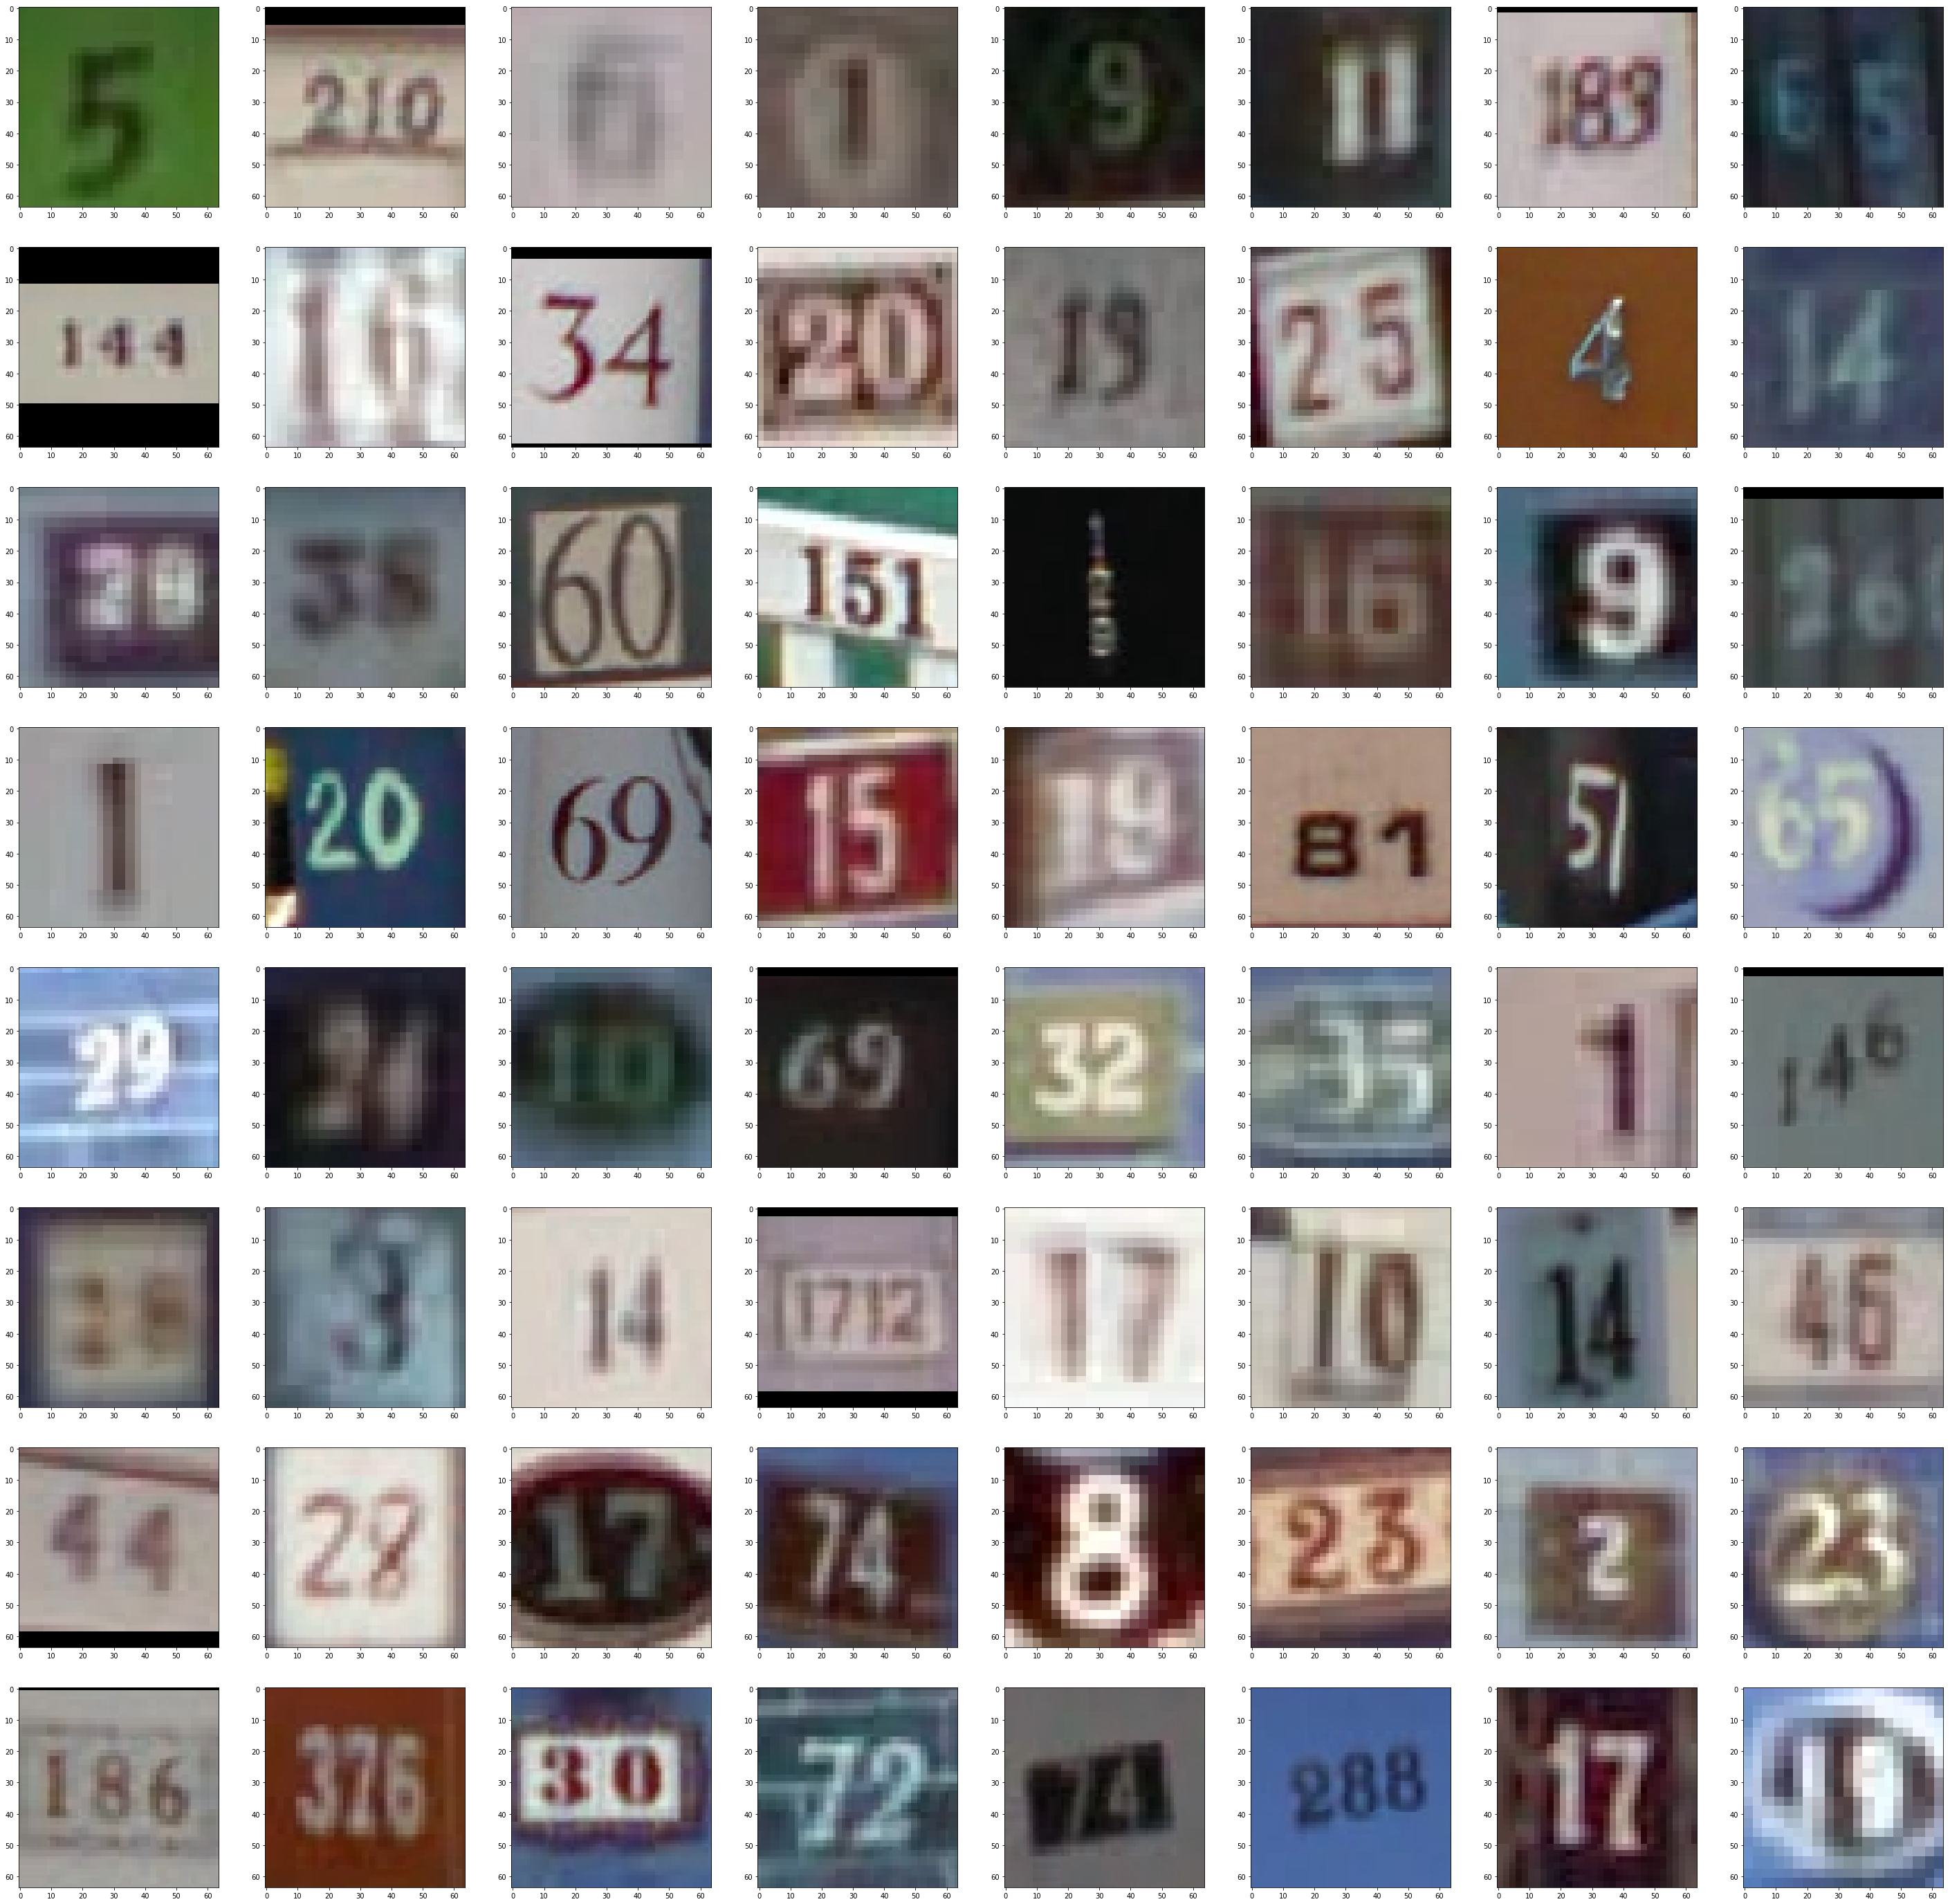

In [54]:
# test images
fig = plt.figure(figsize=(50, 50))  # width, height in inches
for i in range(64):
    sub = fig.add_subplot(8, 8, i + 1)
    sub.imshow(test[i,:,:,:], interpolation='nearest')